# Liu Xingyu - DAV 6150 - Final Project

## Introduction

Over and over years, betting is a thing which charms people much, especially betting on sports. Betting on football is one of them. People either want to try whether he/she has good luck to win a huge amount of money, or just for fun. Some people won a lot of money in one night, then lost it another night. Some people suicided because of losing too much money. There is an idea popping out: the creator of the betting games's final aim is to earn the money, so he would not set the odds of one team to win the match too high if this team has more probability to win the game according to the past match results. But does it mean the team with low odds always win the game? Would the probabilty of winning money be higher if a person always bet on the team which has lower odds at the beginning? 

My Research Questions are:

1. Does the team with lower odds always win the match?
2. Is team with much lower odds has more probability to win the match? (I mean, although a team already has a lower odds comparing with its opposite team in a match, but the odds it has is still much lower than other teams in other matches.)
3. If a person always bet on team with lower odds, what will happen?

In order to satisfy my curiosity, I collect three hundreds of data consisting of three hundreds of different matches in different days, record the match's Team Name with lower Odds, record the Odds of that team, search for recent 20 matches this team had just before the current match I recorded, and how many matches this team won in those recent 20 matches, I also do this same process on its opponent Team in the same match, and finally record the match's result: Win, Lose or Draw.

In this project, I will analyze on those three hundreds of data, I will first perform an exploratory data analysis on each of the variables in an effort to discover any data integrity issues. I collected the data hand by hand, one by one, and enter the collected data into Excel all by own hands, so there is no missing data, but I will also check it by routine in this part. Also, I will uncover outliers, and see the distribution of the data. 

Then, based on the results of my EDA, I will perform the necessary data preparation in order to prepare the data for use. 

After the data preparation I will perform feature selection in different method.

Then I will split the data into training and testing subsets, use the training subset to construct the following models:

- I will use logistic regression model: I will treat 'Win' and Llose' as binary response variables, determine the suitable explanatory variables to construct logistic regression models. I will measure the logistic regression model using metrics accuracy, precision, recall, specificity and f1 score, plotting ROC curve. Make a table to compare metrics of different logistic regression models with different hyperparameters, choose the best logistic regression model through analysis of the table.

- I will use KNN model: I will treat 'Win' and 'Lose' as binary response variables, determine the suitable explanatory variables to construct KNN models. I will measure the KNN model using metrics accuracy, precision, recall, specificity and f1 score, plotting ROC curve. Make a table to compare metrics of different KNN models with different hyperparameters, choose the best KNN model through analysis of the table.

- I will use SVM model: I will treat 'Win' and 'Lose' as binary response variables, determine the suitable explanatory variables to construct SVM models. I will measure the SVM model using metrics accuracy, precision, recall, specificity and f1 score, plotting ROC curve. Make a table to compare metrics of different SVM models with different hyperparameters, choose the best SVM model through analysis of the table.

I will use the bagging method - Random Tree model as an ensemble model, the idea of bagging is that I want to fit several independent models and “average” their predictions in order to obtain a model with a better performance. Random forest algorithm could combine the concepts of bagging and random feature subspace selection to create more robust models.

I will measure the Random Tree model using metrics accuracy, precision, recall, specificity and f1 score, plotting ROC curve. 

## Data Profiling & Domain Knowledge Development

The data I collected is from this website: [this link](https://www.sportdafa.net/en/sports-df/sports)

**TeamName** - the team which has lower Odds in a match 

**Odds** - how much money you will get if the team you chose to bet win the match, in my dataset, this is the Odds of the team which has a lower Odds comparing with its opponent team in a match.

**Country** - In which country does this match happen.

**Continent** - In which continent does this match happen.

**Wins** - How many matches the team with lower Odds won in the past recent 20 matches just before the current match, this information is counted by myself through this website: [this link](https://us.soccerway.com/teams/england/crystal-palace-fc/679/)

**Time** - How long was the team with lower Odds founded? The unit in this term is year. The data is collected by myself through this website: [this link](https://us.soccerway.com/teams/england/crystal-palace-fc/679/), some teams have missing founded time in this website, for this missing part, I searched and collect the data from Wikipedia.

**Opponentwin** - How many matches the opponent team with higher Odds won in the past recent 20 matches just before the current match, this information is counted by myself through this website: [this link](https://us.soccerway.com/teams/england/crystal-palace-fc/679/)

**Opponenttime** - How long was the opponent team founded? The unit in this term is year. The data is collected by myself through this website: [this link](https://us.soccerway.com/teams/england/crystal-palace-fc/679/), some teams have missing founded time in this website, for this missing part, I searched and collect the data from Wikipedia.

**Result** - The Final result of the match, there are three kinds of results, Win means the team with lower Odds won the match, Lose means the team with lower Odds won the match, Draw means neither won the match.

## Exploratory Data Analysis

First I will read the data into python using pandas read csv function from Github repository. Then I will perform an exploratory data analysis on my dataset to determine what data need to be prepared.

In [4]:
#import the file and important packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm

#read in the file
filename = 'https://raw.githubusercontent.com/Bella1025/DAV6150./master/FinalProject.csv'
bet = pd.read_csv(filename)


#check results
bet.head()

,TeamName,Odds,Continent,Country,Wins,Time,Opponentwin,Opponenttime,Result
0,Club Olimpia,1.81,South America,Paraguay,9,118,8,58,Win
1,Odd Grenland,1.88,Europe,Norway,9,126,11,24,Lose
2,Hartford Athletic,1.62,America,America,9,2,6,2,Win
3,Cerro Porteno,1.44,South America,Paraguay,8,108,6,90,Win
4,Melbourne Victory,1.99,Australia,Australia,7,16,6,16,Lose


In [5]:
# check the dataset for null values
bet.isnull().sum()

TeamName        0
Odds            0
Continent       0
Country         0
Wins            0
Time            0
Opponentwin     0
Opponenttime    0
Result          0
dtype: int64

I could see that there is no missing values in the bet data set.

In [6]:
## Check the types of the data
bet.dtypes

TeamName         object
Odds            float64
Continent        object
Country          object
Wins              int64
Time              int64
Opponentwin       int64
Opponenttime      int64
Result           object
dtype: object

From above, I see that variables TeamName, Continent, Country, Result are categorical variables, while Odds, Time, Opponentwin, Opponenttime are numeric variables.

In [7]:
#get summary statistics for numeric variable, including mean, standard deviation, median, quartiles, and range
bet.describe()

,Odds,Wins,Time,Opponentwin,Opponenttime
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,1.937826,9.090301,74.705686,7.096990,68.267559
std,0.401732,2.945000,45.558801,2.766159,45.136802
min,1.050000,0.000000,2.000000,0.000000,1.000000
25%,1.585000,7.000000,27.000000,5.000000,22.500000
50%,1.920000,9.000000,81.000000,7.000000,74.000000
75%,2.260000,11.000000,114.500000,9.000000,110.500000
max,2.900000,18.000000,155.000000,18.000000,155.000000


I found:

- the mean value of Odds is 1.937826, the minimum value of Odds is 1.05, the maximum value of Odds is 2.9
- the mean value of Wins is 9.090301, the minimum value of Wins is 0, the maximum value of Wins is 18.0
- the mean value of Time is 74.705686, the minimum value of Time is 2.0, the maximum value of Time is 155.0
- the mean value of Opponentwin is 7.096990, the minimum value of Opponentwin is 0, the maximum value of Opponentwin is 18.0
- the mean value of Opponenttime is 68.267559, the minimum value of Opponenttime is 1.0, the maximum value of Opponenttime is 155

The one which is meaningful to compare is the mean value of Wins and mean value of Opponentwin, because "Wins" is the number of matches the team with lower Odds won in the past recent 20 matches just before the current match, "Opponentwin" is the number of matches the team with higher Odds won in the past recent 20 matches just before the current match, the setter of the Odds would not set the Odds too high for the team which has more probability to win, therefore, the mean value of "Wins" is greater than the mean value of "Opponentwin" is reasonable, it also manifests that to compare the "Win and Lose" of 20 matches just before the current match is meaningful.

In [8]:
#Check whether there are mistakes and omissions on categorical variables.
classes = ['TeamName','Country','Continent','Result']

for each in classes:
    print(each + ':\n')
    print(list(bet[each].drop_duplicates()))
    print('\n')

TeamName:

['Club Olimpia', 'Odd Grenland', 'Hartford Athletic', 'Cerro Porteno', 'Melbourne Victory', 'Kataller Toyama', 'Roasso Kumamoto', 'AC Nagano Pareiro', 'Azul Claro Numazu', 'Blaublitz Akita', 'FC Politehnica lasi', 'Kagoshima United', 'Brattvag', 'Sydney FC', 'Sydney United 58 FC', 'Wollongong Wolves  FC', 'Shanghai East Asia', 'Newcastle Jet FC', 'Greenville Triumph', 'Tampa Bay Rowdies', 'FK AUDA', 'Longford Town', 'Cabineely FC', 'Bray', 'Wexford ', 'Dunalk', 'FC Dynamo Brest', 'FC Basel', 'St Gallen', 'Young Boys', 'FC Luzern', 'FC Lugano', 'Rangers FC', 'Paris Saint Germain FC', 'AC Perugia Calcio', 'Ascoli Calcio ', 'AC ChievoVerona', 'Beijing Sinobo Guoan', 'Melbourne City FC', 'Sacramento Republic FC', 'Reno 1868 FC', 'Louisville City FC', 'Figueirense FC', 'Shanghai Greenlan Shenhua FC', 'Perth Glory FC', 'Centenary Stormers', 'Queensland Lions FC', 'Peninsula Power', 'Brisbane Roar FC ', 'Internazionale Milano', 'Atalanta', 'Grasshopper', 'Stjarnan men', 'KR Reykjav

From above, I could see there are no omissions and mistakes on the data I collected.

Next I will look at the distributions of numeric data to identify the shape of the distribution.

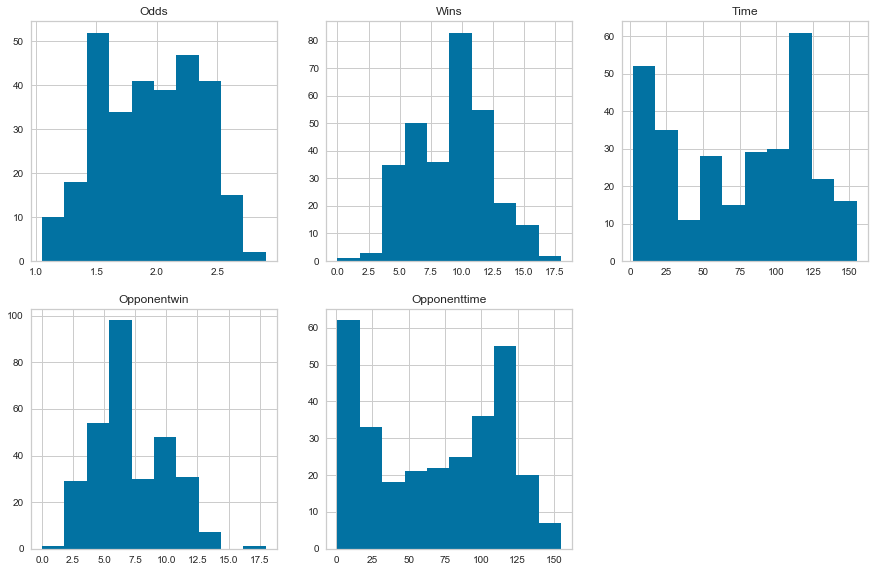

In [9]:
plt.figure(figsize=(15,15))
betn = bet[['Odds','Wins','Time','Opponentwin','Opponenttime']]

i = 1
columns=betn.columns.tolist()
for k in columns[0:] :  
    plt.subplot(3,3,i) 
    plt.hist(betn[k])
    plt.title('%s' %k)
    i=i+1
plt.show()

From the above histograms, I see that "Wins" and "Opponentwin" is approximately to normaly distribution, but not exactly is.

Next I will look at boxplots of the numeric data.

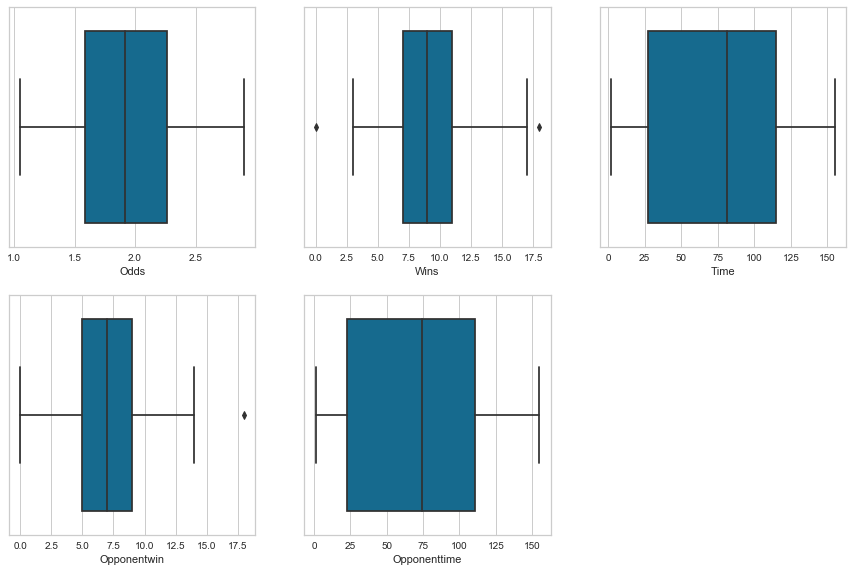

In [10]:
plt.figure(figsize=(15,15))
betn = bet[['Odds','Wins','Time','Opponentwin','Opponenttime']]

i=1
columns=betn.columns.tolist()
for k in columns[0:] :   
    plt.subplot(3,3,i) 
    sns.boxplot(x=k,data=betn)
    i=i+1 
plt.show()

From the boxplots above, I found "Wins" and "Opponentwin" have data that is beyond the normal range, but I do not plan to remove them, because sometimes by many aspects, some teams would behave very well, some teams would crack, it is in the range of normal phenomenon. 

Next, I will plot the correlation heatmap between numeric variables:

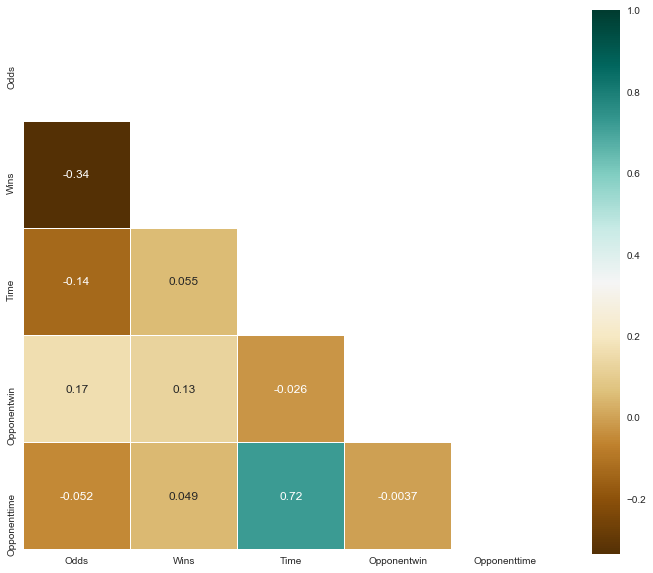

In [11]:
cor_matrix = betn.corr()
## Generate a mask for the upper triangle
mask = np.zeros_like(cor_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
## Set up the matplotlib figure
f, ax = plt.subplots(figsize = (12, 10))
## Draw the heatmap with the mask and correct aspect ratio,mask=True,upper triangular will be hide
sns.heatmap(cor_matrix, mask=mask,
            square = True, linewidths = 0.5, ax = ax, cmap = "BrBG",annot=True)

I see from correlation matrix that the only strong correlatons are between Time and Opponenttime, Time and Opponenttime have correlation of 0.72, which is a positive correlation. 

Also, "Wins" and "Odds" have negative correlation, "Time" and "Odds" have negative correlation, "Opponentwin" and "Time" have negative correlation, "Opponenttime" and "Odds" have negative correlation, although those negative correlations are small, but it could manifest that the setter of the betting tends to think "the team which is founded a long time ago has more probability to win", so they make the Odds lower for those are founded long time ago.

In [12]:
## Summarize the categorical variable "Team Name" by using the function value_counts().
bet['TeamName'].value_counts()

Perth Glory FC                    5
Guangzhou Evergrande Taobao FC    4
Manchester United                 3
Melbourne Victory                 3
Sydney FC                         3
                                 ..
Young Boys                        1
Athletic Club Bilbao              1
Sagan Tosu                        1
RCD Mallorca                      1
Sheffield Wednesday FC            1
Name: TeamName, Length: 245, dtype: int64

In [13]:
## Summarize the categorical variable "Country" by using the function value_counts().
bet['Country'].value_counts()

Australia         41
England           33
Italy             29
Japan             26
America           26
Spain             25
China             14
Sweden            14
Ireland            8
Paraguay           8
Norway             7
Brazil             6
Iceland            5
Swiss              5
Korea              4
Belarus            4
Portugal           4
Iran               4
Switzerland        4
Latvia             4
Mexico             3
Czech Republic     3
Russia             3
Estonia            2
Denmark            2
Slovakia           2
Israel             2
Finland            2
Romania            1
France             1
Turkey             1
New Zealand        1
Scotland           1
Bulgaria           1
Belgium            1
Georgia            1
Argentine          1
Name: Country, dtype: int64

In [14]:
## Summarize the categorical variable "Continent" by using the function value_counts().
bet['Continent'].value_counts()

Europe           151
Asia              58
Australia         42
America           26
South America     22
Name: Continent, dtype: int64

In [15]:
## Summarize the categorical variable "Result" by using the function value_counts().
bet['Result'].value_counts()

Win     157
Lose    104
Draw     38
Name: Result, dtype: int64

From couting I could see most matches I collected are from Australia, England, Italy. Most matches I collected are from Europe. Also, I could see that the teams with lower Odds won most proportion of matches, won about 157/(157+104+38) = 157/299 = 52.5% of matches. 

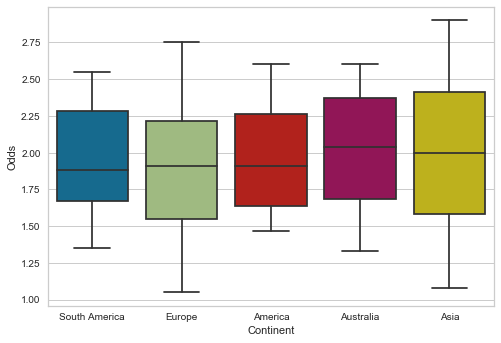

In [16]:
## plot boxplots with Continent and Odds:
sns.boxplot(x='Continent',y='Odds',data = bet)

From above I could see that, Australia has the highest mean of Odds, then is Asia, then is Europe, the lowest mean of Odds comes from South America. 

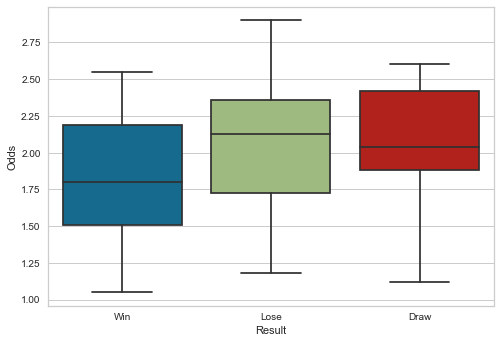

In [17]:
## plot boxplots with Result and Odds:
sns.boxplot(x='Result',y='Odds',data = bet)

From above I could see that, the match which has result "Lose" has the highest mean of Odds, the match which has result "Win" has the lowest mean of Odds, alway in mind that the company will set lower Odds to those teams which have higher probability to win the game, so this may manifest that the gaming company predict the results well.

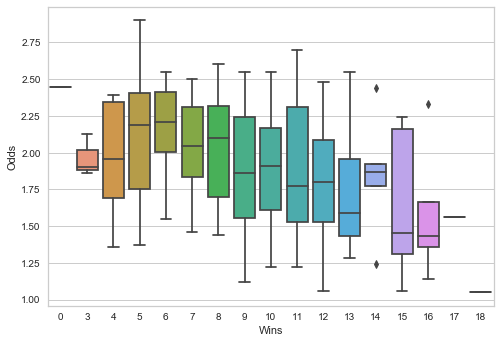

In [18]:
## plot boxplots with Wins and Odds:
sns.boxplot(x='Wins',y='Odds',data = bet)

From above I could see that, the Odds with different "Wins" did not show much regular pattern, but in average, the higher the "Wins" is, the lower the Odds is.

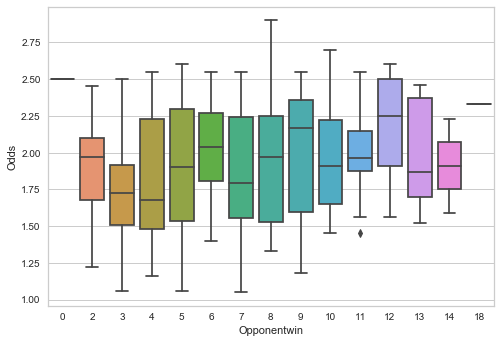

In [19]:
## plot boxplots with Opponentwin and Odds:
sns.boxplot(x='Opponentwin',y='Odds',data = bet)

There is no apparent pattern in relationship between "Opponentwin" and "Odds". I think the company may set the opponent team's Odds depending on its opponent (the team with lower Odds), but not the number of matches it has won in the past.

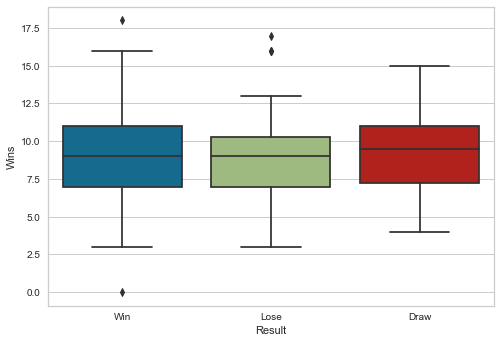

In [20]:
## plot boxplots with Result and Wins:
sns.boxplot(x='Result',y='Wins',data = bet)

From above, I could see that the mean of "Wins" of match with result “Lose” is a little higher than "Win", which manifests that, although based on previous matches' result could help betting company predict the result, but the result of the match is still unpredictable and flexible.

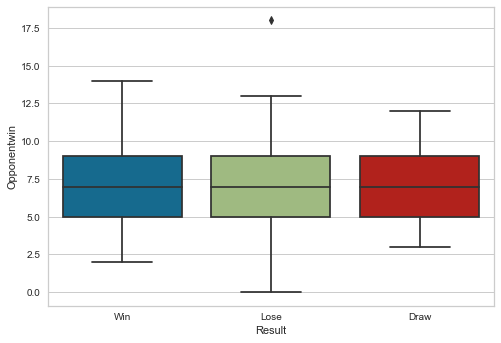

In [21]:
## plot boxplots with Result and Opponentwin:
sns.boxplot(x='Result',y='Opponentwin',data = bet)

From above, I could see that the mean of "Opponentwin" of match with result “Lose” is almost the same with result "Win", which manifests that, although based on previous matches'result could help betting company predict the result, but the result of the match is still unpredictable and flexible.

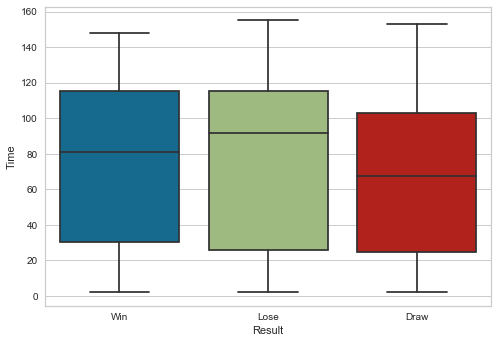

In [22]:
## plot boxplots with categorical variables and numeric variables:
sns.boxplot(x='Result',y='Time',data = bet)

From above, I could see that the result "Lose" is with the highest mean of "Time", while the result "Draw" is with the lowest mean of "Time", maybe less time the team has been founded, less knowledge the betting company would have on that team, so the betting companies do not have much informaton to predict the result, leting the team that is short-time-founded won the match.  (Because in the previous analysis, I can see that betting company somehow tends to think more time the team has been founded, more probability it has to win, so set the Odds with long-founded Team low) 

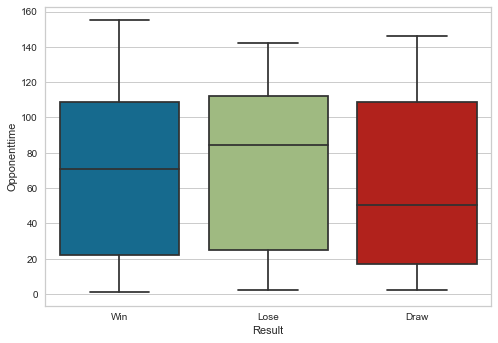

In [23]:
## plot boxplots with Result and Opponenttime:
sns.boxplot(x='Result',y='Opponenttime',data = bet)

The analysis is same as above.

In [24]:
## Group the numeric variables by categorical variables 
bet_group = bet[['Continent','Result','Odds']]
grouped_avg = bet_group.groupby(['Continent','Result'],as_index=False).mean()
grouped_avg

,Continent,Result,Odds
0,America,Draw,2.234000
1,America,Lose,2.047500
2,America,Win,1.875294
3,Asia,Draw,1.886250
4,Asia,Lose,2.254000
5,Asia,Win,1.848667
6,Australia,Draw,2.184000
7,Australia,Lose,2.133684
8,Australia,Win,1.870000
9,Europe,Draw,1.971875


I see from above that the match in South America with the result "Draw" has the higest Odds mean 2.3525, the match in South America with the result "Win" has the lowest Odds mean 1.76.

In [25]:
## Group the numeric variables by categorical variables 
bet_group = bet[['Continent','Result','Wins']]
grouped_avg = bet_group.groupby(['Continent','Result'],as_index=False).mean()
grouped_avg

,Continent,Result,Wins
0,America,Draw,9.000000
1,America,Lose,9.000000
2,America,Win,9.058824
3,Asia,Draw,9.375000
4,Asia,Lose,7.850000
5,Asia,Win,9.266667
6,Australia,Draw,10.000000
7,Australia,Lose,9.000000
8,Australia,Win,9.611111
9,Europe,Draw,8.312500


I see from above that the match in South America with the result "Draw" has the highest "Wins" mean 11.25, the match in Asia with the result "Lose" has the lowest "Wins" mean 7.85. 

Asia's football matches are in generally weaker than other continents', so this result is reasonable.

In [26]:
## Group the numeric variables by categorical variables 
bet_group = bet[['Continent','Result','Opponentwin']]
grouped_avg = bet_group.groupby(['Continent','Result'],as_index=False).mean()
grouped_avg

,Continent,Result,Opponentwin
0,America,Draw,8.000000
1,America,Lose,6.000000
2,America,Win,6.176471
3,Asia,Draw,4.625000
4,Asia,Lose,7.400000
5,Asia,Win,7.700000
6,Australia,Draw,9.200000
7,Australia,Lose,7.842105
8,Australia,Win,8.055556
9,Europe,Draw,7.500000


I see from above that the match in Australia with the result "Draw" has the higest "Opponentwin" mean 9.2, the match in Asia with the result "Draw" has the lowest "Opponentwin" mean 4.625. 

In [27]:
## Group the numeric variables by categorical variables 
bet_group = bet[['Continent','Result','Time']]
grouped_avg = bet_group.groupby(['Continent','Result'],as_index=False).mean()
grouped_avg

,Continent,Result,Time
0,America,Draw,13.600000
1,America,Lose,5.000000
2,America,Win,6.352941
3,Asia,Draw,49.500000
4,Asia,Lose,49.100000
5,Asia,Win,50.133333
6,Australia,Draw,42.200000
7,Australia,Lose,31.842105
8,Australia,Win,37.166667
9,Europe,Draw,96.750000


I see from above that the match in South America with the result "Win" has the higest "Time" mean 110.090909, the match in America with the result "Lose" has the lowest "Time" mean 5.0

In [28]:
## Group the numeric variables by categorical variables 
bet_group = bet[['Continent','Result','Opponenttime']]
grouped_avg = bet_group.groupby(['Continent','Result'],as_index=False).mean()
grouped_avg

,Continent,Result,Opponenttime
0,America,Draw,14.000000
1,America,Lose,5.000000
2,America,Win,6.823529
3,Asia,Draw,31.125000
4,Asia,Lose,36.900000
5,Asia,Win,36.800000
6,Australia,Draw,36.600000
7,Australia,Lose,35.947368
8,Australia,Win,42.833333
9,Europe,Draw,97.687500


I see from above that the match in Europe with the result "Lose" has the highest "Opponenttime" mean 98.777778, the match in America with result "Lose" has the lowest "Opponenttime" mean 5.0

The American Football Teams I collected are generally founded short time ago, and lots of Europian's football teams are founded long time ago, based on this, the table may show there are more stability to predict results of short-times founded Team if someone wants to predict the result based on founded time. 

Next, I will plot some scatter plots to see whether there are some relationships between numeric variables:

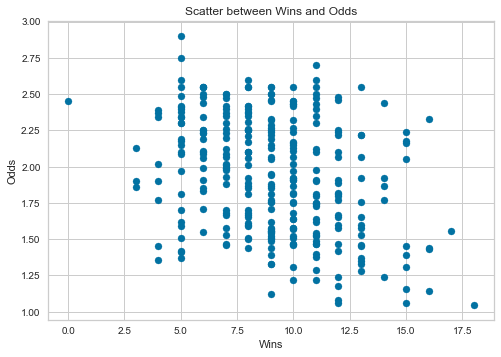

In [29]:
## Scatter plots between Wins and Odds
x = bet['Wins']
y = bet['Odds']
plt.scatter(x,y)
plt.title('Scatter between Wins and Odds')
plt.xlabel('Wins')
plt.ylabel('Odds')
plt.show()

There are no linear relationships between the "Wins" and "Odds", however, there is a decreasing tendency between "Wins" and "Odds", with higher number of "Wins", the Odds tends to decrease. This doubly proves my assumption that betting company would predict the result based on the past behaviors of the Teams. 

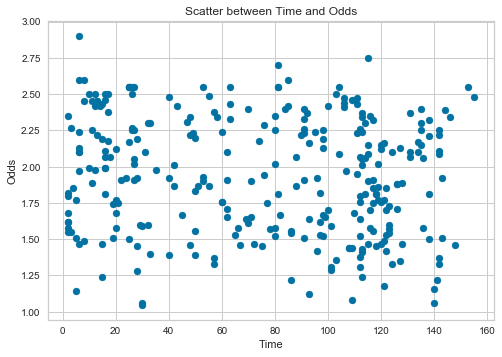

In [30]:
## Scatter plots between Time and Odds
x = bet['Time']
y = bet['Odds']
plt.scatter(x,y)
plt.title('Scatter between Time and Odds')
plt.xlabel('Time')
plt.ylabel('Odds')
plt.show()

The scattor plots between Odds and Time is very random, there is no apparant relationships between them.

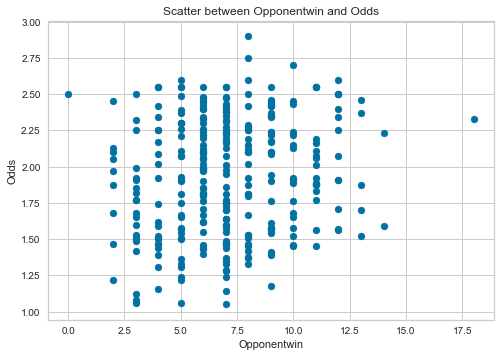

In [31]:
## Scatter plots between Wins and Odds
x = bet['Opponentwin']
y = bet['Odds']
plt.scatter(x,y)
plt.title('Scatter between Opponentwin and Odds')
plt.xlabel('Opponentwin')
plt.ylabel('Odds')
plt.show()

There are some patterns between Opponentwin and Odds, seems like there is an increasing tendency between Opponentwin and Odds, with "Opponentwin" increases, the least Odds of each "Opponentwin" increases. Could not say it is a coincidence that higher "Opponentwin" would cause higher Odds, or the team with result "Lose" would have higher "Wins", but it may double prove that the betting company would set the exact value of Odds more based on match with lower Odds, not the Opponent team.

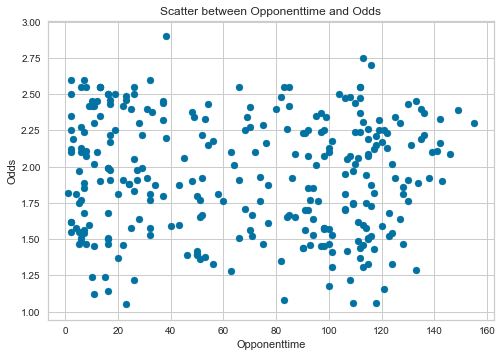

In [32]:
## Scatter plots between Opponenttime and Odds
x = bet['Opponenttime']
y = bet['Odds']
plt.scatter(x,y)
plt.title('Scatter between Opponenttime and Odds')
plt.xlabel('Opponenttime')
plt.ylabel('Odds')
plt.show()

There is no pattern between Opponenttime and Odds.

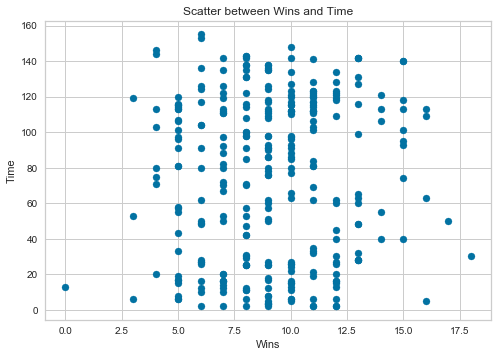

In [33]:
## Scatter plots between Wins and Time
x = bet['Wins']
y = bet['Time']
plt.scatter(x,y)
plt.title('Scatter between Wins and Time')
plt.xlabel('Wins')
plt.ylabel('Time')
plt.show()

There is no pattern between Wins and Time.

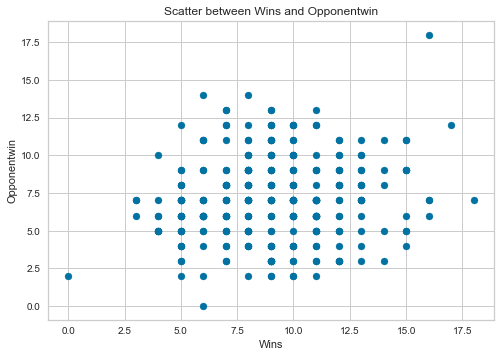

In [34]:
## Scatter plots between Wins and Time
x = bet['Wins']
y = bet['Opponentwin']
plt.scatter(x,y)
plt.title('Scatter between Wins and Opponentwin')
plt.xlabel('Wins')
plt.ylabel('Opponentwin')
plt.show()

The scatter points show that the numeric variables has no linear relationships.

As I mentioned, the setter would not set the Odds of the team which has many "win" result in the past too high, so, would (Wins - Opponentwin) has some linear relationships with Odds? I will check it:

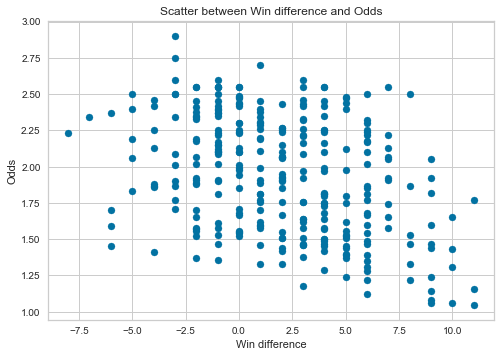

In [35]:
## Scatter plots between Win difference and Odds
x = bet['Wins'] - bet['Opponentwin']
y = bet['Odds']
plt.scatter(x,y)
plt.title('Scatter between Win difference and Odds')
plt.xlabel('Win difference')
plt.ylabel('Odds')
plt.show()

The result is that: the "tendency" is downward, With "Win difference" higher, the Odds would be lower.

## Data Preparation - Label the categorical variables, standardize the numeric data

As there is no need to deal with outliers, and there are no missing values, I will just label the categorical variables and create a dataset that is ready to be used for a model.

In [36]:
#Creating the dependent variable class
factor = pd.factorize(bet['TeamName'])
bet.TeamName = factor[0]
definitions = factor[1]
print(bet.TeamName.head())
print(definitions)

0    0
1    1
2    2
3    3
4    4
Name: TeamName, dtype: int64
Index(['Club Olimpia', 'Odd Grenland', 'Hartford Athletic', 'Cerro Porteno',
       'Melbourne Victory', 'Kataller Toyama', 'Roasso Kumamoto',
       'AC Nagano Pareiro', 'Azul Claro Numazu', 'Blaublitz Akita',
       ...
       'Maccabi Ahi Nazaeth', 'Hapoel Nof Hagalil FC', 'Tractor Sport Club ',
       'Paykan FC', 'Naft Masjed Soleyman FC', 'Foolad Khuzestan FC',
       'IFK Norrkoping', 'Molde FK', 'FC Dila Gori', 'Beroe'],
      dtype='object', length=245)


In [37]:
#Creating the dependent variable class
factor = pd.factorize(bet['Country'])
bet.Country = factor[0]
definitions = factor[1]
print(bet.Country.head())
print(definitions)

0    0
1    1
2    2
3    0
4    3
Name: Country, dtype: int64
Index(['Paraguay', 'Norway', 'America', 'Australia', 'Japan', 'Romania',
       'China', 'England', 'Latvia', 'Ireland', 'Belarus', 'Swiss', 'Scotland',
       'France', 'Italy', 'Brazil', 'Switzerland', 'Iceland', 'Turkey',
       'Portugal', 'New Zealand', 'Denmark', 'Czech Republic', 'Spain',
       'Sweden', 'Korea', 'Mexico', 'Russia', 'Argentine', 'Estonia',
       'Belgium', 'Finland', 'Slovakia', 'Israel', 'Iran', 'Georgia',
       'Bulgaria'],
      dtype='object')


In [38]:
#Creating the dependent variable class
factor = pd.factorize(bet['Result'])
bet.Result = factor[0]
definitions = factor[1]
print(bet.Result.head())
print(definitions)

0    0
1    1
2    0
3    0
4    1
Name: Result, dtype: int64
Index(['Win', 'Lose', 'Draw'], dtype='object')


In [39]:
#Creating the dependent variable class
factor = pd.factorize(bet['Continent'])
bet.Continent = factor[0]
definitions = factor[1]
print(bet.Continent.head())
print(definitions)

0    0
1    1
2    2
3    0
4    3
Name: Continent, dtype: int64
Index(['South America', 'Europe', 'America', 'Australia', 'Asia'], dtype='object')


For further use, I would also standarize the numeric data:

In [40]:
#Standardize the data attributes.
from sklearn import preprocessing
bet['Odds'] = preprocessing.scale(bet['Odds'])

In [41]:
bet['Wins'] = preprocessing.scale(bet['Wins'])

In [42]:
bet['Time'] = preprocessing.scale(bet['Time'])

In [43]:
bet['Opponentwin'] = preprocessing.scale(bet['Opponentwin'])

In [44]:
bet['Opponenttime'] = preprocessing.scale(bet['Opponenttime'])

In [45]:
#create a dataset that is ready to be used for a model
target = bet['Result']
explanatory=bet[['TeamName','Country','Continent','Odds','Wins','Time','Opponentwin','Opponenttime']]
betting=pd.concat([target,explanatory],axis=1)

#check results
betting.head()

,Result,TeamName,Country,Continent,Odds,Wins,Time,Opponentwin,Opponenttime
0,0,0,0,0,-0.318721,-0.030714,0.951888,0.326996,-0.227858
1,1,1,1,1,-0.144183,-0.030714,1.127780,1.413351,-0.982386
2,0,2,2,2,-0.792467,-0.030714,-1.598540,-0.397240,-1.470610
3,0,3,0,0,-1.241278,-0.370842,0.732024,-0.397240,0.482287
4,1,4,3,3,0.130090,-0.710969,-1.290730,-0.397240,-1.159922


In [46]:
#double check that there are no null values in these columns
betting.isnull().sum()

Result          0
TeamName        0
Country         0
Continent       0
Odds            0
Wins            0
Time            0
Opponentwin     0
Opponenttime    0
dtype: int64

## Feature Selection

In the Feature selection part, I would select the feature in four different ways:
1. Since I would construct the Random Forest Classifiers in the end, I would select the features by calculating their entropy and information gain.
2. According to [this link](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/): (How to choose a feature selection method for machine learning), I will also use ANOVA correlation coefficient to select features.
3. I would plot the correlation heatmaps, to find which variables have most correlation with response variable.
4. I would use back-elimination method, use p-values to select the features. According to [this link](https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf).
5. I would select a "final selection set" of all the explanatory variables based on above procedures to select features.

### Does the Result attribute exhibit low entropy or high entropy?

In [47]:
betting['Result'].value_counts()

0    157
1    104
2     38
Name: Result, dtype: int64

In [48]:
# calculate the entropy for Result
from math import log2
# proportion of examples in each class
class0 = 157/299
class1 = 104/299
class2 = 38/299
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2))
# print the result
print('entropy of Result: %.3f bits' % entropy)

entropy of Result: 1.396 bits


From calculation, it shows the target attribute has high entropy.

### 1. Selecting features by calculating entropy and information gain

#### So which explanatory attributes offered high information gain + low entropy? I will calculate entropy and gain information to find it:

#### Calculating "entropy" of each variable:

In [49]:
betting['Continent'].value_counts()

1    151
4     58
3     42
2     26
0     22
Name: Continent, dtype: int64

In [50]:
# calculate the entropy for Continent
from math import log2
# proportion of examples in each class
class0 = 22/299
class1 = 151/299
class2 = 26/299
class3 = 42/299
class4 = 58/194
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3)
            + class4 * log2(class4))
# print the result
print('entropy of Continent: %.3f bits' % entropy)

entropy of Continent: 2.000 bits


In [51]:
betting['Odds'].value_counts(bins = 4)

(0.0927, 1.246]     108
(-1.061, 0.0927]    101
(-2.219, -1.061]     54
(1.246, 2.399]       36
Name: Odds, dtype: int64

In [52]:
# calculate the entropy for Odds
from math import log2
# proportion of examples in each class
class0 = 108/299
class1 = 101/299
class2 = 54/299
class3 = 36/299
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3))
# print the result
print('entropy of Odds: %.3f bits' % entropy)

entropy of Odds: 1.873 bits


In [53]:
betting['Wins'].value_counts(bins = 4)

(-0.0307, 1.5]                   154
(-1.561, -0.0307]                113
(1.5, 3.03]                       20
(-3.0989999999999998, -1.561]     12
Name: Wins, dtype: int64

In [54]:
# calculate the entropy for Wins
from math import log2
# proportion of examples in each class
class0 = 154/299
class1 = 113/299
class2 = 20/299
class3 = 12/299
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3))
# print the result
print('entropy of Wins: %.3f bits' % entropy)

entropy of Wins: 1.471 bits


In [55]:
betting['Time'].value_counts(bins = 4)

(-1.603, -0.758]    93
(0.0834, 0.924]     91
(0.924, 1.765]      67
(-0.758, 0.0834]    48
Name: Time, dtype: int64

In [56]:
# calculate the entropy for Time
from math import log2
# proportion of examples in each class
class0 = 93/299
class1 = 91/299
class2 = 67/299
class3 = 48/299
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3))
# print the result
print('entropy of Time: %.3f bits' % entropy)

entropy of Time: 1.954 bits


In [57]:
betting['Opponentwin'].value_counts(bins = 4)

(-0.94, 0.689]     160
(0.689, 2.319]      84
(-2.577, -0.94]     52
(2.319, 3.948]       3
Name: Opponentwin, dtype: int64

In [58]:
# calculate the entropy for Opponentwin
from math import log2
# proportion of examples in each class
class0 = 160/299
class1 = 84/299
class2 = 52/299
class3 = 3/299
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3))
# print the result
print('entropy of Opponentwin: %.3f bits' % entropy)

entropy of Opponentwin: 1.503 bits


In [59]:
betting['Opponenttime'].value_counts(bins = 4)

(-1.4969999999999999, -0.638]    108
(0.216, 1.07]                     97
(-0.638, 0.216]                   48
(1.07, 1.925]                     46
Name: Opponenttime, dtype: int64

In [60]:
# calculate the entropy for Opponenttime
from math import log2
# proportion of examples in each class
class0 = 108/299
class1 = 97/299
class2 = 48/299
class3 = 46/299
# calculate entropy
entropy = -(class0 * log2(class0) + class1 * log2(class1) + class2 * log2(class2) + class3 * log2(class3))
# print the result
print('entropy of Opponenttime: %.3f bits' % entropy)

entropy of Opponenttime: 1.897 bits


#### Calculating "information gain" of each variable:

Then I will use python's pre-built function mutual_info_classif function to achieve information gain of the explanatory variables:

In [61]:
seed =7
np.random.seed(seed)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.030338
Feature 1: 0.053744
Feature 2: 0.026858
Feature 3: 0.021157
Feature 4: 0.000000
Feature 5: 0.027941
Feature 6: 0.000000
Feature 7: 0.006930


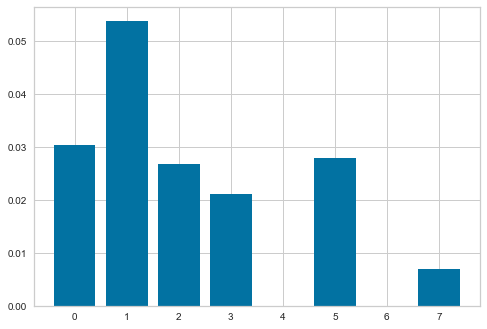

In [62]:
seed =7
np.random.seed(seed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(explanatory, target, test_size=0.2, random_state=4)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Then I would make a table to compare their entropy:

<table>
  <thead>
    <tr>
      <th>Comparative term</th>
      <th>Continent </th>
      <th>Odds</th>
      <th>Wins</th>
      <th>Time</th>
      <th>Opponentwin</th>
      <th>Opponenttime</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>entropy</td>
      <th>2.0</th>
      <th>1.873</th>
      <th>1.471</th>
      <th>1.954</th>
      <th>1.503</th>
      <th>1.897</th>
    </tr>
  </tbody>
</table>

From the table, for entropy: Continent > Time > Opponenttime > odds > Opponentwin > Wins

For information gain: Country > Team Name > Time > Continent

### 2. ANOVA correlation coefficient Feature selection:

In [63]:
#Splitting the data into independent and dependent variables
X = betting[['TeamName','Country','Continent','Odds','Wins','Time','Opponentwin','Opponenttime']].values
y = betting['Result'].values

I will use the train_test_split() function from scikit-learn and use 80% of the data for training and 20% for testing.

In [64]:
from sklearn.model_selection import train_test_split
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [65]:
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (239, 8) (239,)
Test (60, 8) (60,)


In [66]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
fs.fit_transform(X, y)

array([[ 0.00000000e+00, -3.18721274e-01],
       [ 1.00000000e+00, -1.44183433e-01],
       [ 2.00000000e+00, -7.92466841e-01],
       [ 3.00000000e+00, -1.24127843e+00],
       [ 4.00000000e+00,  1.30090316e-01],
       [ 5.00000000e+00,  1.27705327e+00],
       [ 6.00000000e+00, -1.69117411e-01],
       [ 7.00000000e+00, -8.67268772e-01],
       [ 8.00000000e+00,  1.20225134e+00],
       [ 9.00000000e+00, -1.69117411e-01],
       [ 1.00000000e+01,  1.30090316e-01],
       [ 1.10000000e+01,  4.04364065e-01],
       [ 1.20000000e+01, -1.04180661e+00],
       [ 1.30000000e+01,  3.29562133e-01],
       [ 1.40000000e+01,  4.04364065e-01],
       [ 1.50000000e+01, -1.36594832e+00],
       [ 1.60000000e+01, -1.73995797e+00],
       [ 1.70000000e+01,  4.54232019e-01],
       [ 1.80000000e+01,  1.02771350e+00],
       [ 1.90000000e+01,  1.05156339e-01],
       [ 2.00000000e+01, -8.42334795e-01],
       [ 2.10000000e+01, -4.44475246e-02],
       [ 2.20000000e+01,  1.52639304e+00],
       [ 2.

I can then print the scores for each variable (larger is better), and plot the scores for each variable as a bar graph to get an idea of how many and what features I should select.

Feature 0: 8.833677
Feature 1: 0.179445
Feature 2: 0.121774
Feature 3: 13.442911
Feature 4: 0.917684
Feature 5: 0.870939
Feature 6: 0.568164
Feature 7: 0.531868


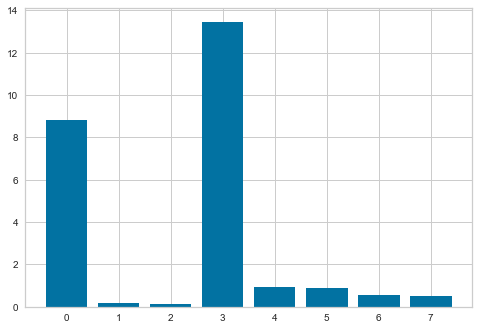

In [67]:
import matplotlib.pyplot as plt
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

The score shows that features 3, 0, 4, and 5 are most relevant to the target. The bar chart also shows the same result.

- feature 3: Odds
- feature 0: Team Name
- feature 4: Wins
- feature 5: Time

### 3. Selecting features by correlation heatmap

Plot the correlation map again to see which variables have strong correlations with traget value:

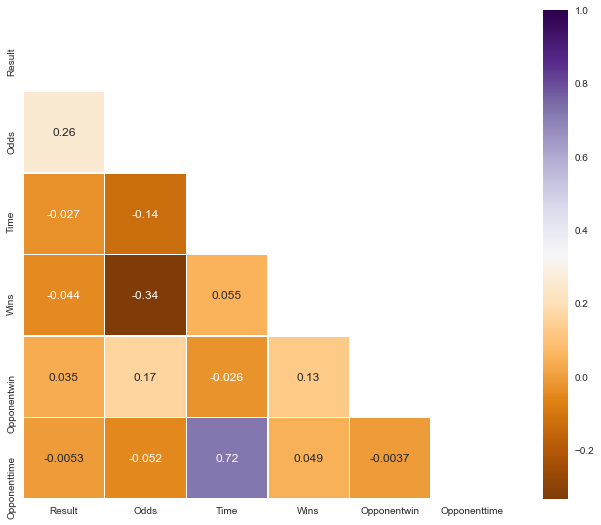

In [68]:
bettingn = betting[['Result','Odds','Time','Wins','Opponentwin','Opponenttime']]
cor_matrix = bettingn.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(cor_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))
#Draw the heatmap with the mask and correct aspect ratio,mask=True,upper triangular will be hide
sns.heatmap(cor_matrix, mask=mask,
            square = True, linewidths = 0.5, ax = ax, cmap = "PuOr",annot=True)

From the heatmap above, I could see that Odds and Result have the strongest correlation among others, then is Wins and Result, then is Opponentwin and Result. Opponenttime have the lowest correlation with Result among others' comparisons with Result.

### 4. Selecting columns based on p-value: Backward Elimination

Compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [69]:
## Make the dataset has only those columns with correlation less than 0.9
columns = np.full((cor_matrix.shape[0],), True, dtype=bool)
for i in range(cor_matrix.shape[0]):
    for j in range(i+1, cor_matrix.shape[0]):
        if cor_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = bettingn.columns[columns]
bettingn = bettingn[selected_columns]

In [70]:
## Convert array to Dataframe
bettingn = pd.DataFrame(bettingn)

In [71]:
## Show the result of selected_columns
selected_columns

Index(['Result', 'Odds', 'Time', 'Wins', 'Opponentwin', 'Opponenttime'], dtype='object')

Next I will select the columns based on how they affect the p-value.

In [72]:
selected_columns = selected_columns[1:]
import statsmodels.formula.api as sm
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(bettingn.iloc[:,1:].values, bettingn.iloc[:,0].values, SL, selected_columns)

In [73]:
## Show the selected columns
selected_columns

Index(['Odds'], dtype='object')

Creating a Dataframe with the columns selected using the p-value and correlation

In [74]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data

,Odds
0,-0.318721
1,-0.144183
2,-0.792467
3,-1.241278
4,0.130090
...,...
294,-0.842335
295,-1.241278
296,-0.069382
297,-0.717665


Using p-values and back-elimination method, the result shows the feature which is valueable to select is "Odds".

### Final selection of features:

1. Since Time and Opponenttime have strong correlations, I decide to choose only one of them to avoid correlations between explanatory variables. 

2. Time is the fourth feature selected by ANOVA, time has higher correlation with Result than Opponenttime. Therefore, I will reject Opponenttime.

3. Odds has highest correlation with Result, Odds is the best feature ANOVA correlation chose, Odds has a good informatiom gain, also Odds has a good entropy, Odds is the only feature selected by back-elimination method, therefore, Odds is one of the explanatory variables I would obviously choose.

4. Wins has higher correlation with Result other than Opponentwin, also, the ANOVA suggests the Wins other than Opponentwin, Wins has lower entropy than opponentwin, Wins should be a good choice, but in my experiment, Wins as a feature does not outperform selection of Opponentwin, therefore, I will choose "Opponentwin"

Finally, I choose Time, Odds, Opponentwin as my explanatory variables.

## Modeling With Selected Features

I will construct three kinds of models in the following sequence:

1. Logistic regression model
2. KNN model
3. SVM model

Then comparing the performance of those two models through metrics and ROC curves.

Then I will construct the fouth ensemble model:
4. Random forest model with features selected above.

Let me get started:

## Logistic regression model

### Model 1 - The first Logistic regression model using features selected above:

- Time
- Odds
- Opponentwin

Since logistic regression model is used for binary classification, therefore, I would drop the rows with Result "Draw"

In [75]:
betting = betting[betting.Result != 2]

In [76]:
## show the result
betting['Result'].value_counts()

0    157
1    104
Name: Result, dtype: int64

Split the data into training set and testing set for prearing for a logistic regression modeling:

In [77]:
## Set a random seed to make sure every time the result is the same
seed =7
np.random.seed(seed)
X = betting[['Odds','Time','Opponentwin']]
y = betting['Result'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [78]:
# Sanity check on training data
X_train[:5]

,Odds,Time,Opponentwin
169,1.351855,1.765387,-0.397240
213,-1.415816,1.479563,0.326996
168,0.778374,0.116403,-1.121476
56,1.202251,0.556132,0.326996
277,-0.218985,-1.554567,-1.483595


In [79]:
# Sanity check on training data
y_train

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [80]:
#ignore warnings
np.warnings.filterwarnings('ignore')
##using the LogisticRegression() method for this model
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)
X_test_sm, y_test_sm = smote.fit_sample(X_test,y_test)
model1 = LogisticRegression()
model1.fit(X_sm, y_sm)

LogisticRegression()

In [81]:
## The reason to choose cv = 30 here is that almost every day I collected 20-30 data in data collecting process
from sklearn.model_selection import cross_val_score
results1 = cross_val_score(model1,X_sm,y_sm,cv=30)
results1.mean()

0.6351190476190476

In [82]:
# calculate the accuracy of the model relative to the training data set
model1.score(X_sm, y_sm)

0.6422413793103449

Print the confusion matrix:

In [83]:
y_pred = model1.predict(X_test_sm)
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test_sm, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,27,14
1,14,27


Preparing for calculating metrics:

In [84]:
def perf_measure(Actual, Predicted):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==1:
           TP += 1
        if Predicted[i]==1 and Actual[i]!=Predicted[i]:
           FP += 1
        if Actual[i]==Predicted[i]==0:
           TN += 1
        if Predicted[i]==0 and Actual[i]!=Predicted[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [85]:
perf_measure(y_test_sm,y_pred)

(27, 14, 27, 14)

Calculating accuracy for each class:

In [86]:
def Accuracy(Actual, Predicted):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==1:
           TP += 1
        if Predicted[i]==1 and Actual[i]!=Predicted[i]:
           FP += 1
        if Actual[i]==Predicted[i]==0:
           TN += 1
        if Predicted[i]==0 and Actual[i]!=Predicted[i]:
           FN += 1
        
        Accuracy = (TP + TN)/(TP + TN + FP + FN)

    return(Accuracy)

In [87]:
Accuracy(y_test_sm,y_pred)

0.6585365853658537

Calculating precision for each class:

In [88]:
def Precision(Actual, Predicted):
    TP = 0
    FP = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==1:
           TP += 1
        if Predicted[i]==1 and Actual[i]!=Predicted[i]:
           FP += 1
    try:
        return(TP)/(TP + FP)
    except ZeroDivisionError:
        return 0 

In [89]:
Precision(y_test_sm,y_pred)

0.6585365853658537

Calculating recall (also called the true positive rate or the sensitivity) for each class:

In [90]:
def Recall(Actual, Predicted):
    TP = 0
    FN = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==1:
           TP += 1
        if Predicted[i]==0 and Actual[i]!=Predicted[i]:
           FN += 1
    try:
        return(TP)/(TP + FN)
    except ZeroDivisionError:
        return 0  

In [91]:
Recall(y_test_sm,y_pred)

0.6585365853658537

Calculating specificity (also called the true negative rate) for each class:

In [92]:
def Specificity(Actual, Predicted):
    TN = 0
    FP = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==0:
           TN += 1
        if Predicted[i]==1 and Actual[i]!=Predicted[i]:
           FP += 1
    try:
        return(TN)/(TN + FP)
    except ZeroDivisionError:
        return 0 

In [93]:
Specificity(y_test_sm,y_pred)

0.6585365853658537

Calculating f1 score for each class:

In [94]:
def f1score(Actual, Predicted):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==1:
           TP += 1
        if Predicted[i]==1 and Actual[i]!=Predicted[i]:
           FP += 1
        if Actual[i]==Predicted[i]==0:
           TN += 1
        if Predicted[i]==0 and Actual[i]!=Predicted[i]:
           FN += 1
    try:
        return (2*TP)/(TP+FP+TP+FN)
    except ZeroDivisionError:
        return 0

In [95]:
f1score(y_test_sm,y_pred)

0.6585365853658537

#### Mathews Correlation Coefficient(MCC)

Reference from [this link](https://towardsdatascience.com/is-accuracy-everything-96da9afd540d), 

"Many scientists believe that MCC is the single most informative metric for any binary classifier.
MCC is calculated using the TN, FN, TP, and FP.
MCC is not a biased metric and flexible enough to work properly even in highly unbalanced data.
MCC returns a value between -1 and +1.
A coefficient of +1 represents a perfect prediction,
A coefficient of 0 represents no better than a random prediction,
A coefficient of −1 indicates total disagreement between prediction and observation."

In [96]:
from math import sqrt
def MCC(Actual, Predicted):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range (max(len(Actual),len(Predicted))): 
        if Actual[i]==Predicted[i]==1:
           TP += 1
        if Predicted[i]==1 and Actual[i]!=Predicted[i]:
           FP += 1
        if Actual[i]==Predicted[i]==0:
           TN += 1
        if Predicted[i]==0 and Actual[i]!=Predicted[i]:
           FN += 1
    try:
        return ((TP*TN)-(FP*FN))/sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    except ZeroDivisionError:
        return 0

In [97]:
MCC(y_test_sm,y_pred)

0.3170731707317073

In [98]:
# print classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        41
           1       0.66      0.66      0.66        41

    accuracy                           0.66        82
   macro avg       0.66      0.66      0.66        82
weighted avg       0.66      0.66      0.66        82



### Plot the ROC curve:

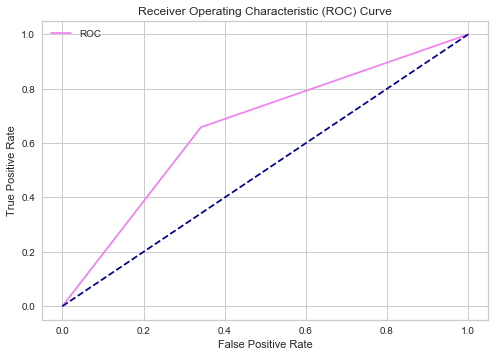

In [99]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='violet', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test_sm,y_pred)
plot_roc_curve(fpr, tpr)

In [100]:
# calculate AUC
auc = roc_auc_score(y_test_sm,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.659


### Model 2 - The second Logistic regression model using features selected above:

- Time
- Odds
- Opponentwin

The above model was run with the default parameters determined by the LogisticRegression modules. Could I improve the model by tuning the hyperparameters of the model? To achieve this, I define a “grid” of parameters that I would want to test out in the model and select the best model using GridSearchCV. 

According to [this link](https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5) (Logistic Regression Model Tuning with scikit-learn — Part 1)

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}
]

# Create grid search object

clf1 = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf1 = clf1.fit(X_sm, y_sm)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished


In [102]:
results2 = cross_val_score(best_clf1,X_sm,y_sm,cv=30)
results2.mean()

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


0.6351190476190476

The mean of score of after crossing and validating tuned logistic regression model has the same score of the first logistic regression model constructed.

Also, I tried setting cv = 30 in GridSearchCV(), but the score I got is lower than setting to cv = 5,
also, I tried setting cv = 5 in cross_val_score(), but the score I got is lower than setting to cv = 30.


In [103]:
# calculate the accuracy of the model relative to the training data set
best_clf1.score(X_sm, y_sm)

0.6379310344827587

However, the score of tuned logistic regression model is a little higher than the first logistic model I constructed.

Print the confusion matrix:

In [104]:
y_pred = best_clf1.predict(X_test_sm)
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test_sm, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,26,15
1,14,27


Preparing for calculating metrics:

In [105]:
perf_measure(y_test_sm,y_pred)

(27, 15, 26, 14)

Calculating accuracy for each class:

In [106]:
Accuracy(y_test_sm,y_pred)

0.6463414634146342

Calculating precision for each class:

In [107]:
Precision(y_test_sm,y_pred)

0.6428571428571429

Calculating recall for each class:

In [108]:
Recall(y_test_sm,y_pred)

0.6585365853658537

Calculating specificity for each class:

In [109]:
Specificity(y_test_sm,y_pred)

0.6341463414634146

Calculating f1 score for each class:

In [110]:
f1score(y_test_sm,y_pred)

0.6506024096385542

In [111]:
MCC(y_test_sm,y_pred)

0.29277002188455997

In [112]:
# print classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64        41
           1       0.64      0.66      0.65        41

    accuracy                           0.65        82
   macro avg       0.65      0.65      0.65        82
weighted avg       0.65      0.65      0.65        82



### Plot the ROC curve

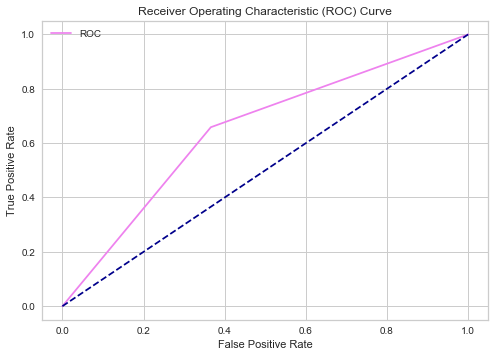

In [113]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='violet', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test_sm,y_pred)
plot_roc_curve(fpr, tpr)

In [114]:
# calculate AUC
auc = roc_auc_score(y_test_sm,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.646


### Model 3 - The third Logistic regression model using features selected above:

- Time
- Odds
- Opponentwin

This time I will add RandomForestClassifier to pipeline() to tune the logistic regression model:

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf2 = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf2 = clf2.fit(X_sm, y_sm)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


In [116]:
results3 = cross_val_score(best_clf2,X_sm,y_sm,cv=30)
results3.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 469 out of 500 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


0.6351190476190476

The mean of the result is the same with above two logistic regresssion model.

In [117]:
# calculate the accuracy of the model relative to the training data set
best_clf2.score(X_sm, y_sm)

0.6379310344827587

Print the confusion matrix:

In [118]:
y_pred = best_clf2.predict(X_test_sm)
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test_sm, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,26,15
1,14,27


The confustion matrix is the same with the second logistic regression model, which means the metrics are all the same.

Make a table to compare the performance of these three different logistic regression models, since the result of the second model is the same as the third model, I will only compare two models:

<table>
  <thead>
    <tr>
      <th>Comparative term</th>
      <th>Logistic model </th>
      <th>Tuned Logistic model</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Cross Validation Score</td>
      <th>0.6351190476190476</th>
      <th>0.6351190476190476</th>
    </tr>
    <tr>
      <td>Score</td>
      <th>0.6422413793103449</th>
      <th>0.6379310344827587</th>
    </tr>
      <tr>
      <td>Accuracy</td>
      <th>0.6585365853658537</th>
      <th>0.6463414634146342</th>
    </tr>
       <tr>
      <td>Precision</td>
      <th>0.6585365853658537</th>
      <th>0.6428571428571429</th>
    </tr>
      <tr>
      <td>Recall</td>
      <th>0.6585365853658537</th>
      <th>0.6585365853658537</th>
    </tr>
      <tr>
      <td>Specificity</td>
      <th>0.6585365853658537</th>
      <th>0.6341463414634146</th>
    </tr>
      <tr>
      <td>f1 score</td>
      <th>0.6585365853658537</th>
      <th>0.6506024096385542</th>
    </tr>
      <tr>
      <td>MCC</td>
      <th>0.3170731707317073</th>
      <th>0.29277002188455997</th>
    </tr>
      <tr>
      <td>AUC</td>
      <th>0.659</th>
      <th>0.646</th>
    </tr>
  </tbody>
</table>

Overall, the original logistic regression model is a little better than tuned logistic regression model.

## KNN model 

### Model 1 - KNN model with features selected above.

- Time
- Odds
- Opponentwin

When dealing with constructing KNN model, the most important thing is to determine the values of neighbors, I will use elbow method, the code of elbow method is from [this link](https://pythonprogramminglanguage.com/kmeans-elbow-method/)

I will find the similar neighbors using the k that is refereced from elbow plotting, the code to find neighbors is from [this link](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)

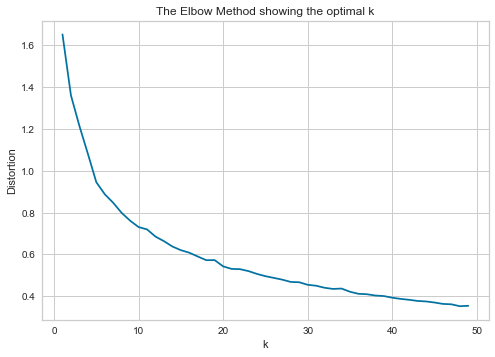

In [119]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# create new plot and data
plt.plot()
X = betting[['Odds','Time','Opponentwin']].values
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### The figure shows the best k is around 9

In [120]:
## Show the 9 neighbors 
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
# Test distance function
dataset = betting[['Odds','Time','Opponentwin','TeamName']].values
neighbors = get_neighbors(dataset, dataset[0], 9)
for neighbor in neighbors:
    print(neighbor)

[-0.31872127  0.95188841  0.32699635  0.        ]
[-0.31872127  0.95188841  0.32699635  0.        ]
[-1.94051388e-01  9.73874868e-01 -3.51218306e-02  1.20000000e+02]
[ -0.44339116   0.99586132   0.68911454 214.        ]
[-4.68325137e-01  9.29901961e-01 -3.51218306e-02  1.73000000e+02]
[-5.18193091e-01  1.06182068e+00 -3.51218306e-02  1.32000000e+02]
[-0.09431548  0.88592906  0.68911454 72.        ]
[-5.92995023e-01  9.07915508e-01 -3.51218306e-02  1.06000000e+02]
[ 0.20489225  0.97387487  0.32699635 30.        ]


In [121]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [122]:
dataset = betting[['Odds','Time','Opponentwin']].values
prediction = predict_classification(dataset, dataset[0], 9)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

Expected 0, Got 0.


In [123]:
#ignore warnings
np.warnings.filterwarnings('ignore')
##using the KNeighborsClassifier() method for this model
## Set a random seed to make sure every time the result is the same
seed =7
np.random.seed(seed)
X = betting[['Odds','Time','Opponentwin']]
y = betting['Result'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)
X_test_sm, y_test_sm = smote.fit_sample(X_test,y_test)

In [124]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_sm, y_sm)

KNeighborsClassifier(n_neighbors=9)

In [125]:
from sklearn.model_selection import cross_val_score
results2 = cross_val_score(neigh,X_sm,y_sm,cv=30)
results2.mean()

0.4982142857142857

In [126]:
# calculate the accuracy of the model relative to the training data set
neigh.score(X_sm, y_sm)

0.6336206896551724

Print the confusion matrix:

In [127]:
y_pred = neigh.predict(X_test_sm)
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test_sm, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,21,20
1,13,28


Preparing for calculating metrics:

In [128]:
perf_measure(y_test_sm,y_pred)

(28, 20, 21, 13)

Calculating accuracy for each class:

In [129]:
Accuracy(y_test_sm,y_pred)

0.5975609756097561

Calculating precision for each class:

In [130]:
Precision(y_test_sm,y_pred)

0.5833333333333334

Calculating recall (also called the true positive rate or the sensitivity) for each class:

In [131]:
Recall(y_test_sm,y_pred)

0.6829268292682927

Calculating specificity (also called the true negative rate) for each class:

In [132]:
Specificity(y_test_sm,y_pred)

0.5121951219512195

Calculating f1 score for each class:

In [133]:
f1score(y_test_sm,y_pred)

0.6292134831460674

In [134]:
MCC(y_test_sm,y_pred)

0.19802950859533486

In [135]:
# print classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.51      0.56        41
           1       0.58      0.68      0.63        41

    accuracy                           0.60        82
   macro avg       0.60      0.60      0.59        82
weighted avg       0.60      0.60      0.59        82



### Plot the ROC curve:

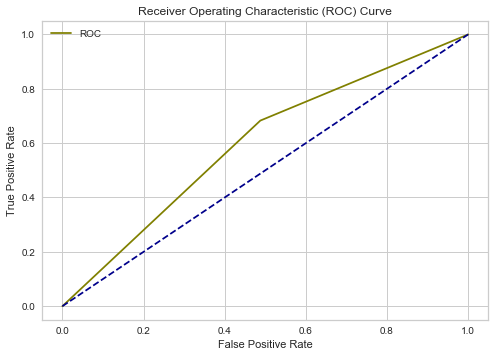

In [136]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='olive', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test_sm,y_pred)
plot_roc_curve(fpr, tpr)

In [137]:
# calculate AUC
auc = roc_auc_score(y_test_sm,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.598


### Model 2 - Tuned KNN model with features selected above.

- Time
- Odds
- Opponentwin

This time, I will also construct a tuned KNN model to see whether the performance has improved.

The tutorial of tuning KNN model [is here](https://medium.com/datadriveninvestor/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f)

In [138]:
#List Hyperparameters that I want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf3 = GridSearchCV(knn_2, hyperparameters, cv=5)
#Fit the model
best_model = clf3.fit(X_sm,y_sm)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 1


Best neighbors is 1, best leaf_size is 1 and best p is 2, using these hyperparameters to tune the KNN model:

In [139]:
neigh2 = KNeighborsClassifier(n_neighbors=1,leaf_size = 1, p = 2)
neigh2.fit(X_sm, y_sm)

KNeighborsClassifier(leaf_size=1, n_neighbors=1)

In [140]:
from sklearn.model_selection import cross_val_score
results5 = cross_val_score(neigh2,X_sm,y_sm,cv=30)
results5.mean()

0.6113095238095239

In [141]:
# calculate the accuracy of the model relative to the training data set
neigh2.score(X_sm, y_sm)

1.0

Print the confusion matrix:

In [142]:
y_pred = neigh2.predict(X_test_sm)
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test_sm, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,24,17
1,21,20


Preparing for calculating metrics:

In [143]:
perf_measure(y_test_sm,y_pred)

(20, 17, 24, 21)

In [144]:
Accuracy(y_test_sm,y_pred)

0.5365853658536586

In [145]:
Precision(y_test_sm,y_pred)

0.5405405405405406

Calculating recall (also called the true positive rate or the sensitivity) for each class:

In [146]:
Recall(y_test_sm,y_pred)

0.4878048780487805

Calculating specificity (also called the true negative rate) for each class:

In [147]:
Specificity(y_test_sm,y_pred)

0.5853658536585366

Calculating f1 score for each class:

In [148]:
f1score(y_test_sm,y_pred)

0.5128205128205128

In [149]:
MCC(y_test_sm,y_pred)

0.07352146220938077

In [150]:
# print classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.59      0.56        41
           1       0.54      0.49      0.51        41

    accuracy                           0.54        82
   macro avg       0.54      0.54      0.54        82
weighted avg       0.54      0.54      0.54        82



### Plot the ROC curve:

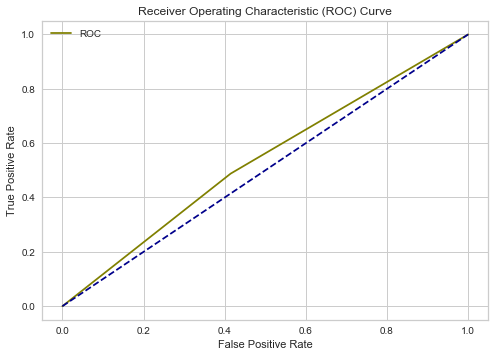

In [151]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='olive', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test_sm,y_pred)
plot_roc_curve(fpr, tpr)

In [152]:
# calculate AUC
auc = roc_auc_score(y_test_sm,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.537


Make a table to compare the performance of KNN model and tuned KNN model:

<table>
  <thead>
    <tr>
      <th>Comparative term</th>
      <th>KNN model </th>
      <th>Tuned KNN model</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Cross Validation Score</td>
      <th>0.4982142857142857</th>
      <th>0.6113095238095239</th>
    </tr>
    <tr>
      <td>Score</td>
      <th>0.6336206896551724</th>
      <th>1.0</th>
    </tr>
      <tr>
      <td>Accuracy</td>
      <th>0.5975609756097561</th>
      <th>0.5365853658536586</th>
    </tr>
       <tr>
      <td>Precision</td>
      <th>0.5833333333333334</th>
      <th>0.5405405405405406</th>
    </tr>
      <tr>
      <td>Recall</td>
      <th>0.6829268292682927</th>
      <th>0.4878048780487805</th>
    </tr>
      <tr>
      <td>Specificity</td>
      <th>0.5121951219512195</th>
      <th>0.5853658536585366</th>
    </tr>
      <tr>
      <td>f1 score</td>
      <th>0.6292134831460674</th>
      <th>0.5128205128205128</th>
    </tr>
      <tr>
      <td>MCC</td>
      <th>0.19802950859533486</th>
      <th>0.07352146220938077</th>
    </tr>
      <tr>
      <td>AUC</td>
      <th>0.598</th>
      <th>0.537</th>
    </tr>
  </tbody>
</table>

The table shows tuned KNN model has very high score, much higher validation score, higher specificity than original KNN model, but for other metrics, the original KNN model is better.

## SVM model 

- Time
- Odds
- Opponentwin

### Model 1 - SVM model with linear kernal with features selected above.

In [153]:
#ignore warnings
np.warnings.filterwarnings('ignore')
seed =7
np.random.seed(seed)
X = betting[['Odds','Time','Opponentwin']]
y = betting['Result'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
##using the svm() method for this model
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)
X_test_sm, y_test_sm = smote.fit_sample(X_test,y_test)
from sklearn import svm
#Create a svm Classifier
clf4 = svm.SVC(kernel='linear', C = 10000) # Linear Kernel
#Train the model using the training sets
clf4.fit(X_sm, y_sm)

SVC(C=10000, kernel='linear')

In [154]:
from sklearn.model_selection import cross_val_score
results6 = cross_val_score(clf4,X_sm,y_sm,cv=30)
results6.mean()

0.6345238095238095

In [155]:
# calculate the accuracy of the model relative to the training data set
clf4.score(X_sm, y_sm)

0.6336206896551724

Print the confusion matrix:

In [156]:
y_pred = clf4.predict(X_test_sm)
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test_sm, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,27,14
1,14,27


Preparing for calculating metrics:

In [157]:
perf_measure(y_test_sm,y_pred)

(27, 14, 27, 14)

Calculating accuracy for each class:

In [158]:
Accuracy(y_test_sm,y_pred)

0.6585365853658537

Calculating Precision for each class:

In [159]:
Precision(y_test_sm,y_pred)

0.6585365853658537

Calculating recall (also called the true positive rate or the sensitivity) for each class:

In [160]:
Recall(y_test_sm,y_pred)

0.6585365853658537

Calculating specificity (also called the true negative rate) for each class:

In [161]:
Specificity(y_test_sm,y_pred)

0.6585365853658537

Calculating f1 score for each class:

In [162]:
f1score(y_test_sm,y_pred)

0.6585365853658537

Calculating MCC for each class:

In [163]:
MCC(y_test_sm,y_pred)

0.3170731707317073

In [164]:
# print classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        41
           1       0.66      0.66      0.66        41

    accuracy                           0.66        82
   macro avg       0.66      0.66      0.66        82
weighted avg       0.66      0.66      0.66        82



### Plot the ROC curve:

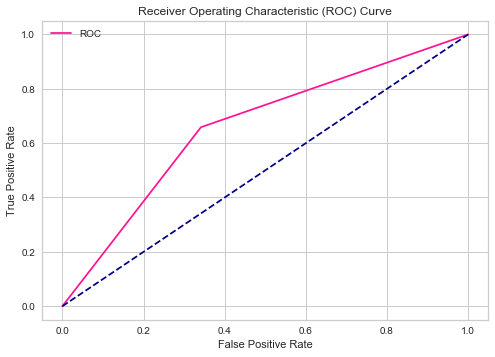

In [165]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='deeppink', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test_sm,y_pred)
plot_roc_curve(fpr, tpr)

In [166]:
# calculate AUC
auc = roc_auc_score(y_test_sm,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.659


### Model 2 - SVM model with rbf kernal with features selected above.

In the second construction of SVM model, I will use a kernal "rbf":

In [167]:
#ignore warnings
np.warnings.filterwarnings('ignore')
seed =7
np.random.seed(seed)
X = betting[['Odds','Time','Opponentwin']]
y = betting['Result'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
##using the svm() method for this model
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)
X_test_sm, y_test_sm = smote.fit_sample(X_test,y_test)
from sklearn import svm
#Create a svm Classifier
clf5 = svm.SVC(kernel='rbf', C = 10000) # Linear Kernel
#Train the model using the training sets
clf5.fit(X_sm, y_sm)

SVC(C=10000)

In [168]:
from sklearn.model_selection import cross_val_score
results7 = cross_val_score(clf5,X_sm,y_sm,cv=30)
results7.mean()

0.5273809523809524

In [169]:
# calculate the accuracy of the model relative to the training data set
clf5.score(X_sm, y_sm)

0.8836206896551724

Print the confusion matrix:

In [170]:
y_pred = clf5.predict(X_test_sm)
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test_sm, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,22,19
1,20,21


Preparing for calculating metrics:

In [171]:
perf_measure(y_test_sm,y_pred)

(21, 19, 22, 20)

Calculating accuracy for each class:

In [172]:
Accuracy(y_test_sm,y_pred)

0.524390243902439

Calculating Precision for each class:

In [173]:
Precision(y_test_sm,y_pred)

0.525

Calculating recall (also called the true positive rate or the sensitivity) for each class:

In [174]:
Recall(y_test_sm,y_pred)

0.5121951219512195

Calculating specificity (also called the true negative rate) for each class:

In [175]:
Specificity(y_test_sm,y_pred)

0.5365853658536586

Calculating f1 score for each class:

In [176]:
f1score(y_test_sm,y_pred)

0.5185185185185185

Calculating MCC for each class:

In [177]:
MCC(y_test_sm,y_pred)

0.04879500364742666

In [178]:
# print classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53        41
           1       0.53      0.51      0.52        41

    accuracy                           0.52        82
   macro avg       0.52      0.52      0.52        82
weighted avg       0.52      0.52      0.52        82



### Plot the ROC curve

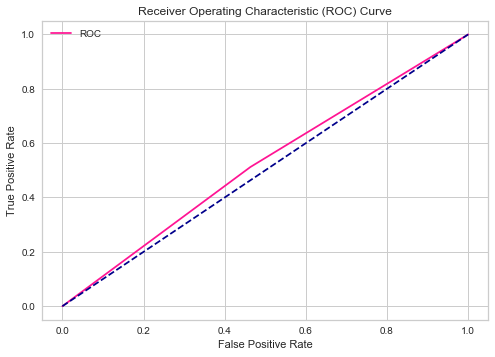

In [179]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='deeppink', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test_sm,y_pred)
plot_roc_curve(fpr, tpr)

In [180]:
# calculate AUC
auc = roc_auc_score(y_test_sm,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.524


### Model 3 - SVM model with poly kernal with features selected above.

In the third construction of SVM model, I will use a kernal "poly":

In [181]:
#ignore warnings
np.warnings.filterwarnings('ignore')
seed =7
np.random.seed(seed)
X = betting[['Odds','Time','Opponentwin']]
y = betting['Result'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
##using the svm() method for this model
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)
X_test_sm, y_test_sm = smote.fit_sample(X_test,y_test)
from sklearn import svm
#Create a svm Classifier
clf6 = svm.SVC(kernel='poly', C = 10000) # Linear Kernel
#Train the model using the training sets
clf6.fit(X_sm, y_sm)

SVC(C=10000, kernel='poly')

In [182]:
from sklearn.model_selection import cross_val_score
results8 = cross_val_score(clf6,X_sm,y_sm,cv=30)
results8.mean()

0.5999999999999999

In [183]:
# calculate the accuracy of the model relative to the training data set
clf6.score(X_sm, y_sm)

0.6379310344827587

Print the confusion matrix:

In [184]:
y_pred = clf6.predict(X_test_sm)
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test_sm, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,27,14
1,23,18


Preparing for calculating metrics:

In [185]:
perf_measure(y_test_sm,y_pred)

(18, 14, 27, 23)

Calculating accuracy for each class:

In [186]:
Accuracy(y_test_sm,y_pred)

0.5487804878048781

Calculating Precision for each class:

In [187]:
Precision(y_test_sm,y_pred)

0.5625

Calculating recall (also called the true positive rate or the sensitivity) for each class:

In [188]:
Recall(y_test_sm,y_pred)

0.43902439024390244

Calculating specificity (also called the true negative rate) for each class:

In [189]:
Specificity(y_test_sm,y_pred)

0.6585365853658537

Calculating f1 score for each class:

In [190]:
f1score(y_test_sm,y_pred)

0.4931506849315068

Calculating MCC for each class:

In [191]:
MCC(y_test_sm,y_pred)

0.1

In [192]:
# print classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.66      0.59        41
           1       0.56      0.44      0.49        41

    accuracy                           0.55        82
   macro avg       0.55      0.55      0.54        82
weighted avg       0.55      0.55      0.54        82



### Plot the ROC curve

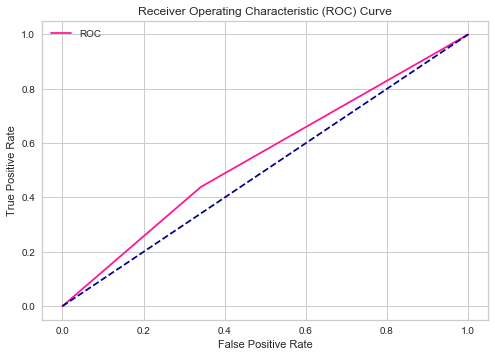

In [193]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='deeppink', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test_sm,y_pred)
plot_roc_curve(fpr, tpr)

In [194]:
# calculate AUC
auc = roc_auc_score(y_test_sm,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.549


Make a table to compare the first SVM model, the second SVM model and the third SVM model:

<table>
  <thead>
    <tr>
      <th>Comparative term</th>
      <th>SVM model with kernal linear</th>
      <th>SVM model with kernal rbf</th>
      <th>SVM model with kernal poly</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Cross Validation Score</td>
      <th>0.6345238095238095</th>
      <th>0.5273809523809524</th>
      <th>0.5999999999999999</th>
    </tr>
    <tr>
      <td>Score</td>
      <th>0.6336206896551724</th>
      <th>0.8836206896551724</th>
      <th>0.6379310344827587</th>
    </tr>
      <tr>
      <td>Accuracy</td>
      <th>0.6585365853658537</th>
      <th>0.524390243902439</th>
      <th>0.5487804878048781</th>
    </tr>
       <tr>
      <td>Precision</td>
      <th>0.6585365853658537</th>
      <th>0.525</th>
      <th>0.5625</th>
    </tr>
      <tr>
      <td>Recall</td>
      <th>0.6585365853658537</th>
      <th>0.5121951219512195</th>
      <th>0.43902439024390244</th>
    </tr>
      <tr>
      <td>Specificity</td>
      <th>0.6585365853658537</th>
      <th>0.5365853658536586</th>
      <th>0.6585365853658537</th>
    </tr>
      <tr>
      <td>f1 score</td>
      <th>0.6585365853658537</th>
      <th>0.5185185185185185</th>
      <th>0.4931506849315068</th>
    </tr>
      <tr>
      <td>MCC</td>
      <th>0.3170731707317073</th>
      <th>0.04879500364742666</th>
      <th>0.1</th>
    </tr>
      <tr>
      <td>AUC</td>
      <th>0.659</th>
      <th>0.524</th>
      <th>0.549</th>
    </tr>
  </tbody>
</table>

The table shows except Cross validation score and pre-built score, in comparing with metrics, SVM model with kernal linear outperforms other SVM models.

## Random Forest Classifier

In [195]:
#ignore warnings
np.warnings.filterwarnings('ignore')
seed =7
np.random.seed(seed)
X = betting[['Odds','Time','Opponentwin']]
y = betting['Result'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
##using the LogisticRegression() method for this model
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)
X_test_sm, y_test_sm = smote.fit_sample(X_test,y_test)
forest = RandomForestClassifier().fit(X_sm, y_sm)

In [196]:
from sklearn.model_selection import cross_val_score
results9 = cross_val_score(forest,X_sm,y_sm,cv=30)
results9.mean()

0.549404761904762

In [197]:
# calculate the accuracy of the model relative to the training data set
forest.score(X_sm, y_sm)

1.0

Print the confusion matrix:

In [198]:
y_pred = forest.predict(X_test_sm)
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test_sm, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,23,18
1,15,26


Preparing for calculating metrics:

In [199]:
perf_measure(y_test_sm,y_pred)

(26, 18, 23, 15)

Calculating accuracy for each class:

In [200]:
Accuracy(y_test_sm,y_pred)

0.5975609756097561

Calculating Precision for each class:

In [201]:
Precision(y_test_sm,y_pred)

0.5909090909090909

Calculating Recall for each class:

In [202]:
Recall(y_test_sm,y_pred)

0.6341463414634146

Calculating Specificity for each class:

In [203]:
Specificity(y_test_sm,y_pred)

0.5609756097560976

Calculating f1 score for each class:

In [204]:
f1score(y_test_sm,y_pred)

0.611764705882353

In [205]:
MCC(y_test_sm,y_pred)

0.19564639521780738

In [206]:
# print classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58        41
           1       0.59      0.63      0.61        41

    accuracy                           0.60        82
   macro avg       0.60      0.60      0.60        82
weighted avg       0.60      0.60      0.60        82



### Plot the ROC curve:

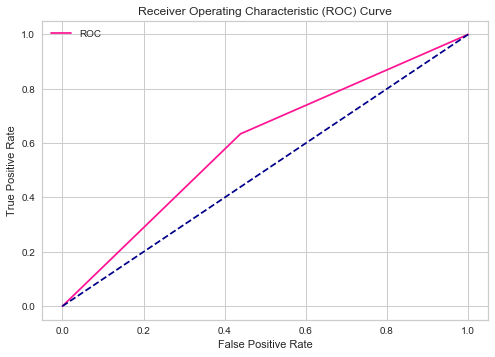

In [207]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='deeppink', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test_sm,y_pred)
plot_roc_curve(fpr, tpr)

In [208]:
# calculate AUC
auc = roc_auc_score(y_test_sm,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.598


## Using Random Forest Model to do an ensemble approach

I will combine three models in Random Forest Model, these three models are:

- the first logistic regression model I constructed above
- the first KNN model I constructed above
- the SVM model with kernal linear

In [209]:
#ignore warnings
np.warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

seed =7
np.random.seed(seed)
X = betting[['Odds','Time','Opponentwin']]
y = betting['Result'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
##using the LogisticRegression() method for this model
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)
X_test_sm, y_test_sm = smote.fit_sample(X_test,y_test)

In [210]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []
model = LogisticRegression()
estimators.append(('logistic', model))

In [211]:
neigh = KNeighborsClassifier(n_neighbors=9)
estimators.append(('knn', neigh))

In [212]:
svm = SVC(kernel='linear') # Linear Kernel
estimators.append(('svm', svm))

In [213]:
# Defining the ensemble model
ensemble = RandomForestClassifier()

In [214]:
ensemble.fit(X_sm, y_sm)

RandomForestClassifier()

In [215]:
y_pred = ensemble.predict(X_test_sm)

In [216]:
#Confisuin matrix
cm_HybridEnsembler = confusion_matrix(y_test_sm, y_pred)
cm_HybridEnsembler

array([[23, 18],
       [15, 26]])

Print the confusion matrix:

In [217]:
y_pred = ensemble.predict(X_test_sm)
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test_sm, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,23,18
1,15,26


Preparing for calculating metrics:

In [218]:
perf_measure(y_test_sm,y_pred)

(26, 18, 23, 15)

Calculating accuracy for each class:

In [219]:
Accuracy(y_test_sm,y_pred)

0.5975609756097561

Calculating Precision for each class:

In [220]:
Precision(y_test_sm,y_pred)

0.5909090909090909

Calculating Recall for each class:

In [221]:
Recall(y_test_sm,y_pred)

0.6341463414634146

Calculating Specificity for each class:

In [222]:
Specificity(y_test_sm,y_pred)

0.5609756097560976

Calculating f1 score for each class:

In [223]:
f1score(y_test_sm,y_pred)

0.611764705882353

Calculating MCC for each class:

In [224]:
MCC(y_test_sm,y_pred)

0.19564639521780738

In [225]:
# print classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58        41
           1       0.59      0.63      0.61        41

    accuracy                           0.60        82
   macro avg       0.60      0.60      0.60        82
weighted avg       0.60      0.60      0.60        82



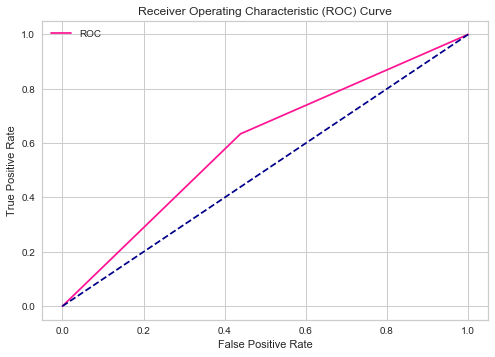

In [226]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='deeppink', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test_sm,y_pred)
plot_roc_curve(fpr, tpr)

In [227]:
# calculate AUC
auc = roc_auc_score(y_test_sm,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.598


Create a table to compare the metrics of different models:

<table>
  <thead>
    <tr>
      <th>Comparative term</th>
      <th>Logistic regression model </th>
      <th>KNN model</th>
      <th>SVM model</th>
      <th>Random Forest ensemble model</th>
    </tr>
  </thead>
  <tbody>
      <tr>
      <td>Cross Validation score</td>
      <th>0.6351190476190476</th>
      <th>0.4982142857142857</th>
      <th>0.6345238095238095</th>
      <th>nan</th>
    </tr>
       <tr>
      <td>scores</td>
      <th>0.6422413793103449</th>
      <th>0.6336206896551724</th>
      <th>0.6336206896551724</th>
      <th>nan</th>
    </tr>
    <tr>
      <td>Accuracy for Lose</td>
      <th>0.6585365853658537</th>
      <th>0.5975609756097561</th>
      <th>0.6585365853658537</th>
      <th>0.5975609756097561</th>
    </tr>
    <tr>
      <td>Precision for Lose</td>
      <th>0.6585365853658537</th>
      <th>0.5833333333333334</th>
      <th>0.6585365853658537</th>
      <th>0.5909090909090909</th>
      </tr>
     <tr>
      <td>Recall for Lose</td>
      <th>0.6585365853658537</th>
      <th>0.6829268292682927</th>
      <th>0.6585365853658537</th>
      <th>0.6341463414634146</th>
      </tr>
      <tr>
      <td>Specificity for Lose</td>
      <th>0.6585365853658537</th>
      <th>0.5121951219512195</th>
      <th>0.6585365853658537</th>
      <th>0.5609756097560976</th>
      </tr>
     <tr>
      <td>f1 score for Lose</td>
      <th>0.6585365853658537</th>
      <th>0.6292134831460674</th>
      <th>0.6585365853658537</th>
      <th>0.611764705882353</th>
      </tr>
      <tr>
      <td>MCC</td>
      <th>0.3170731707317073</th>
      <th>0.19802950859533486</th>
      <th>0.3170731707317073</th>
      <th>0.19564639521780738</th>
      </tr>
      <tr>
      <td>AUC</td>
      <th>0.659</th>
      <th>0.598</th>
      <th>0.659</th>
      <th>0.598</th>
      </tr>
  </tbody>
</table>

<table>
  <thead>
    <tr>
      <th>Comparative term</th>
      <th>Logistic regression model </th>
      <th>KNN model</th>
      <th>SVM model</th>
      <th>Random Forest ensemble model</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy for Win</td>
      <th>0.66</th>
      <th>0.54</th>
      <th>0.66</th>
      <th>0.60</th>
    </tr>
    <tr>
      <td>Precision for Win</td>
      <th>0.66</th>
      <th>0.53</th>
      <th>0.66</th>
      <th>0.61</th>
      </tr>
     <tr>
      <td>Recall for Win</td>
      <th>0.66</th>
      <th>0.59</th>
      <th>0.66</th>
      <th>0.56</th>
      </tr>
     <tr>
      <td>f1 score for Win</td>
      <th>0.66</th>
      <th>0.56</th>
      <th>0.66</th>
      <th>0.58</th>
      </tr>
  </tbody>
</table>

- Accuracy for Lose: Logistic Regression model = SVM model > KNN model = Random Forest Classifer
- Precision for Lose: Logistic Regression model = SVM model > KNN model > Random Forest Classifier 
- Recall for Lose:   KNN model > Logistic Regression model = SVM model > Random Forest Classifer
- Specificity for Lose: Logistic Regression model = SVM model > Random Forest Classifer > KNN model
- f1 score for Lose: Logistic Regression model = SVM model > KNN model > Random Forest Classifer
- MCC for Lose: Logistic Regression model = SVM model > KNN model > Random Forest Classifer
- AUC for Lose: Logistic Regression model = SVM model > KNN model = Random Forest Classifer

- Accuracy for Win: Logistic Regression model = SVM model > Random Forest Classifer > KNN model
- Precision for Win: Logistic Regression model = SVM model > Random Forest Classifer > KNN model 
- Recall for Win:  Logistic Regression model = SVM model > KNN model > Random Forest Classifer
- f1 score for Win: Logistic Regression model = SVM model > Random Forest Classifer > KNN model

Logistic Regression model and SVM model outperforms other models.

In Recall for Lose, KNN model outperforms other models.

It could be shown that the metrics of KNN model, Random Forest Classifier is not as good as Logistic regression model's, why is that?

According to [this link](https://www.quora.com/What-are-the-disadvantages-of-using-a-decision-tree-for-classification), Decision Tree's do not work best if having a lot of un-correlated variables, since Random Forest is a modified Decision Tree, so is Random Forest. 

Therefore, for a better Random Tree model, I have to select features again.

According to [this link](https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/), I can use SelectFromModel() function to select the features for Random Forest Classifier.

## Train a Random Forest:

In [228]:
seed =7
np.random.seed(seed)
forest = RandomForestClassifier(n_estimators=1000,random_state=0)

# Train the model
forest.fit(X_sm, y_sm)

# Print the name and gini importance of each feature
for feature in zip(explanatory, forest.feature_importances_):
    print(feature)

('TeamName', 0.415643470917547)
('Country', 0.38133610621377023)
('Continent', 0.20302042286868272)


The scores above are the importance scores for each variable. First, all the importance scores add up to 100%. Second, TeamName and Country are far more important than the other features. Combined, TeamName and Country have an importance of 79.7%, Clearly these are the most importance features.

### Create A Data Subset With Only The Most Important Features

In [229]:
#ignore warnings
np.warnings.filterwarnings('ignore')
seed =7
np.random.seed(seed)
X = betting[['TeamName','Country','Continent']]
y = betting['Result'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)
X_test_sm, y_test_sm = smote.fit_sample(X_test,y_test)
forest = RandomForestClassifier().fit(X_sm, y_sm)

Print the confusion matrix:

Since the index of out of range so I will only pick proportion of values to make confusion matrix:

In [230]:
y_pred = forest.predict(X_sm)
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test_sm[0:82], y_pred[0:82], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,25,16
1,20,21


Preparing for calculating metrics:

In [231]:
perf_measure(y_test_sm[0:82],y_pred[0:82])

(21, 16, 25, 20)

Calculating accuracy for each class:

In [232]:
Accuracy(y_test_sm[0:82],y_pred[0:82])

0.5609756097560976

Calculating precision for each class:

In [233]:
Precision(y_test_sm[0:82],y_pred[0:82])

0.5675675675675675

Calculating recall for each class:

In [234]:
Recall(y_test_sm[0:82],y_pred[0:82])

0.5121951219512195

Calculating specificity for each class:

In [235]:
Specificity(y_test_sm[0:82],y_pred[0:82])

0.6097560975609756

Calculating f1 score for each class:

In [236]:
f1score(y_test_sm[0:82],y_pred[0:82])

0.5384615384615384

Calculating MCC for each class:

In [237]:
MCC(y_test_sm[0:82],y_pred[0:82])

0.12253577034896797

In [238]:
# print classification report
from sklearn.metrics import classification_report 
print(classification_report(y_test_sm[0:82], y_pred[0:82]))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58        41
           1       0.57      0.51      0.54        41

    accuracy                           0.56        82
   macro avg       0.56      0.56      0.56        82
weighted avg       0.56      0.56      0.56        82



### Plot the ROC curve:

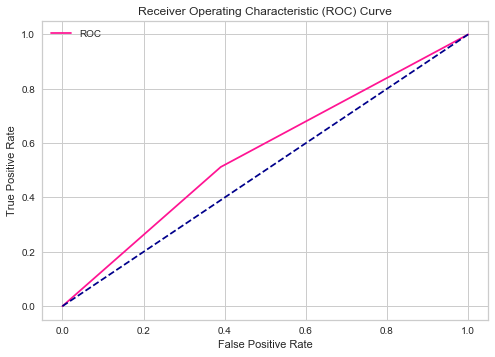

In [239]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='deeppink', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test_sm[0:82],y_pred[0:82])
plot_roc_curve(fpr, tpr)

In [240]:
# calculate AUC
auc = roc_auc_score(y_test_sm[0:82],y_pred[0:82])
print('AUC: %.3f' % auc)

AUC: 0.561


Overall, the trained Random Forest model with other set of explanatory variables did not give a little better result than the previous one.

Why and When do Random Forest fail?

According to [this link](https://dl.acm.org/doi/10.5555/3327144.3327221) "Forests can become inconsistent with either no subsampling or too severe subsampling. As a second consequence we can show that trees that have good performance in nearest-neighbor search can be a poor choice for random forests."

In my example, for the first set of explanatory variables, the Random Forest may suffer from no subsampling, for the second explanatory variables set I chose, the Random Forest may suffer from too severe subsampling.

This project shows Random Forest Classifier did not outperform other models all the time, in this project, Logistic Model outperforms other models.

Also, the SVM with kernal linear shows the same strong power as Logistic regression model did.

### Time for answer ressearch questions: 

1. Does the team with lower odds always win the match?

Answer: The result “Wins” occupies a little higher proportion of result, but the entropy is high (with high uncertainty) that means the answer is “No”.

2. Is team with much lower odds has more probability to win the match? (I mean, although a team already has a lower odds comparing with its opposite team in a match, but the odds it has is still much lower than other teams in other matches.)

Answer : Seems like, but few Odds could satisfy this range. 

3. If a person always bet on team with lower odds, what will happen?

Answer: If he bets following the principle of logistic regression model or SVM model, carefully choose the team based on Odds, founded time, number of wins of the team’s opponent, he could get the “Win” result with almost 66% accuracy and precision. However, that could not guarantee he would win the money, because for that "34%" he may lose much.

Anyway, betting is a dangerous game !

## Conclusion:

1. The exploratory Data analysis shows: the betting company did predict the results based on Team's past matches' results, but the founded time of team did not influence the decisons the betting company made. However, in the analysis, I found there are some relationships between founded time of teams and results, this part may be the aspect in which the betting company did not consider when deciding the Odds.

2. I used four different methods to select the features, Odds became the most important feature since most methods recommend it. Also, time is the second important one. When getting into experiment, I found Opponentwin behaves better than Wins, the combinations of these features give the best result in my experiment and trials. Therefore, Odds, Time and Opponentwin became the final selection of features to construct models.

3. I constructed 11 models in total: one Logistic regression model, one tuned logistic regression model, one tuned logistic regression model with Random Forest Classifier, one KNN model, one tuned KNN model, one SVM model with kernal linear, one SVM model with kernal rbf, one SVM model with kernal poly, one Random Forest Classifier, one Random Forest ensemble model which combines three best models, one final Random Forest model with another set of features.

4. Through comparing, the result shows original Logistic model and SVM model with kernel linear give the best result, that may manifest the match result has linear relationships between the combinations of the explanatory variables.

5. This project also shows in some specific case, Random Forest model did not outperform other models. I could not rely on Random Forest model in every case in further's working or studying.

6. With the "best" model chosen, the accuracy and precision is around 66%, that displays betting is really a uncertain, challenging and dangerous game.

Thanks for reading!